In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from operator import add
#import seaborn as sns
import glob as glob

In [39]:
n=50
def get_bo_data(n=50,string="bo_L*"): 
 flag=0
 for file in glob.glob(string):
    placeholder= pd.read_csv(file, delimiter="\t", dtype=np.float32)
    print('file is:',file,'shape of input data:',placeholder.shape)
    placeholder['min']=placeholder.Y.expanding(1).min()
    placeholder=placeholder.head(n)
    _place_= placeholder['min']
    _place_= np.array(_place_)
    minY=_place_.min();
    #print(minY)
    if placeholder['min'].shape[0]<=n:
        shorten=n-placeholder['min'].shape[0]
        _place_= np.pad(_place_,(0,shorten),'constant', constant_values=(minY))       
    if flag==0:
       datalcb=_place_.reshape(1,-1);flag=1;
    else: 
       datalcb=np.concatenate((datalcb, _place_.reshape(1,-1)),axis=0)  
 print(datalcb.shape)
 return datalcb
data_lcb= get_bo_data(n,"bo_L*")
data_ei= get_bo_data(n,"bo_E*")
print('data lcb shape:',data_lcb.shape,'data ei shape:',data_ei.shape)

file is: bo_LCB2 shape of input data: (64, 6)
file is: bo_LCB4 shape of input data: (52, 6)
file is: bo_LCB1 shape of input data: (36, 6)
file is: bo_LCB3 shape of input data: (38, 6)
file is: bo_LCB5 shape of input data: (50, 6)
(5, 50)
file is: bo_EI5 shape of input data: (105, 6)
file is: bo_EI2 shape of input data: (100, 6)
file is: bo_EI4 shape of input data: (100, 6)
file is: bo_EI1 shape of input data: (100, 6)
file is: bo_EI3 shape of input data: (100, 6)
(5, 50)
data lcb shape: (5, 50) data ei shape: (5, 50)


In [40]:
def get_pymoo_data(n=50,string="pymoo_G*"): 
 flag=0
 for file in glob.glob(string):
    placeholder= pd.read_csv(file, delimiter=",",names=list('abntY'), header=None)
    print('file is:',file,'shape of input data:',placeholder.shape)
    placeholder['min']=placeholder.Y.expanding(1).min()
    placeholder=placeholder.head(n)
    _place_= placeholder['min']
    _place_= np.array(_place_)
    minY=_place_.min();
    #print(minY)
    if placeholder['min'].shape[0]<=n:
        shorten=n-placeholder['min'].shape[0]
        _place_= np.pad(_place_,(0,shorten),'constant', constant_values=(minY))       
    if flag==0:
       datalcb=_place_.reshape(1,-1);flag=1;
    else: 
       datalcb=np.concatenate((datalcb, _place_.reshape(1,-1)),axis=0)  
 print(datalcb.shape)
 return datalcb
data_ga= get_pymoo_data(n,"pymoo_G*")
data_nm= get_pymoo_data(n,"pymoo_N*")
data_lhc= get_pymoo_data(n,"doe_lhc*")
data_vmc= get_pymoo_data(n,"doe_vmc*")
print('data lcb shape:',data_lcb.shape,'data ei shape:',data_ei.shape)
print('data lhc shape:',data_lhc.shape,'data vmc shape:',data_vmc.shape)

file is: pymoo_GA5.csv shape of input data: (50, 5)
file is: pymoo_GA1.csv shape of input data: (100, 5)
file is: pymoo_GA4.csv shape of input data: (50, 5)
file is: pymoo_GA3.csv shape of input data: (50, 5)
file is: pymoo_GA2.csv shape of input data: (100, 5)
(5, 50)
file is: pymoo_NM1.csv shape of input data: (100, 5)
file is: pymoo_NM2.csv shape of input data: (77, 5)
file is: pymoo_NM4.csv shape of input data: (50, 5)
file is: pymoo_NM3.csv shape of input data: (50, 5)
file is: pymoo_NM5.csv shape of input data: (50, 5)
(5, 50)
file is: doe_lhc1.csv shape of input data: (50, 5)
file is: doe_lhc5.csv shape of input data: (50, 5)
file is: doe_lhc4.csv shape of input data: (50, 5)
file is: doe_lhc2.csv shape of input data: (50, 5)
file is: doe_lhc3.csv shape of input data: (50, 5)
(5, 50)
file is: doe_vmc2.csv shape of input data: (50, 5)
file is: doe_vmc4.csv shape of input data: (50, 5)
file is: doe_vmc5.csv shape of input data: (50, 5)
file is: doe_vmc1.csv shape of input data: (5

In [42]:
data_lcb_m=np.mean(data_lcb, axis=0); print('data lcb shape:',data_lcb_m.shape)
data_ei_m=np.mean(data_ei, axis=0); print('data ei shape:',data_ei_m.shape)
data_ga_m=np.mean(data_ga, axis=0); print('data ga shape:',data_ga_m.shape)
data_nm_m=np.mean(data_nm, axis=0); print('data nm shape:',data_nm_m.shape)
data_lhc_m=np.mean(data_lhc, axis=0); print('data lhc shape:',data_lhc_m.shape)
data_vmc_m=np.mean(data_vmc, axis=0); print('data vmc shape:',data_vmc_m.shape)

data lcb shape: (50,)
data ei shape: (50,)
data ga shape: (50,)
data nm shape: (50,)
data lhc shape: (50,)
data vmc shape: (50,)


In [43]:
index=np.arange(1,(n+1),dtype=int)
index

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

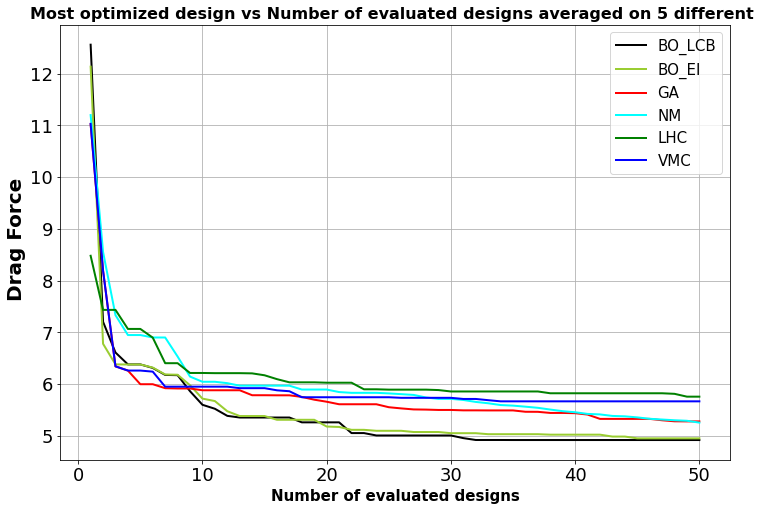

In [44]:
fig,ax=plt.subplots(figsize=(12,8))

plt.plot(index,data_lcb_m,c='black',label='BO_LCB',linewidth=2.0)
plt.plot(index,data_ei_m,c='yellowgreen',label='BO_EI',linewidth=2.0)
plt.plot(index,data_ga_m,c='red',label='GA',linewidth=2.0)
plt.plot(index,data_nm_m,c='cyan',label='NM',linewidth=2.0)
plt.plot(index,data_lhc_m,c='green',label='LHC',linewidth=2.0)
plt.plot(index,data_vmc_m,c='blue',label='VMC',linewidth=2.0)

plt.legend(loc='best',fontsize=15)
#plt.legend(loc="lower center", ncol=4,fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=18)
plt.title('Most optimized design vs Number of evaluated designs averaged on 5 different ',fontsize=16, weight='bold')
#plt.hlines(max_uni,0,110,linestyles= 'dashed')
#plt.hlines(max_uni,6,25,linestyles= 'dashed')
#plt.vlines(6,0,max_uni,linestyles= 'dashed')
#plt.vlines(5.5,0,max_lhc,linestyles= 'dashed')
#plt.xticks(np.arange(0, 25+1, 1.0))
#plt.xlim(0,26)
#plt.ylim(0,85)
#plt.xticks(np.arange(0, 94, 1))
#plt.yticks(np.arange(0,10.0,0.1))
#plt.xlim(0,26)
#plt.ylim(5,8)
plt.xlabel('Number of evaluated designs',fontsize=15,weight='bold')
plt.ylabel(' Drag Force',fontsize=20,weight='bold')
plt.grid()
plt.show()
#fig.savefig('../fig/comparison_result1.png')

In [24]:
"""
#define values
values = [1100, 2200]

#drop rows that contain any value in the list
boei_data = boei_data[boei_data.Y.isin(values) == False]
bolcb_data = bolcb_data[bolcb_data.Y.isin(values) == False]

ga_data = ga_data[ga_data.Y.isin(values) == False]
lhcminimax_data = lhcminimax_data[lhcminimax_data.Y.isin(values) == False]

vmc_data = vmc_data[vmc_data.Y.isin(values) == False]
nm_data = nm_data[nm_data.Y.isin(values) == False]
"""

'\n#define values\nvalues = [1100, 2200]\n\n#drop rows that contain any value in the list\nboei_data = boei_data[boei_data.Y.isin(values) == False]\nbolcb_data = bolcb_data[bolcb_data.Y.isin(values) == False]\n\nga_data = ga_data[ga_data.Y.isin(values) == False]\nlhcminimax_data = lhcminimax_data[lhcminimax_data.Y.isin(values) == False]\n\nvmc_data = vmc_data[vmc_data.Y.isin(values) == False]\nnm_data = nm_data[nm_data.Y.isin(values) == False]\n'

In [21]:
lhcminimax_data.loc[lhcminimax_data['Y'].idxmin()]

a        545.656791
b        234.818213
c        549.524996
d        191.000000
n          1.506551
t         14.462271
V      22156.138583
Y          5.379029
min        5.379029
Name: 93, dtype: float64